In [37]:
%load_ext autoreload
%autoreload 2


import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute absolute path to the directory you want to import from
sys.path.append(os.path.abspath(".."))

import main

b = 3
data_path = "../data/IMS/1st_test/"
data = f"features_{b}.csv"

df = pd.read_csv(os.path.join(data_path, data))

df = main.preprocessing(df) 

X_train, X_test, X_val = main.test_train_data(df)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.4306 - val_loss: 0.3464
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4295 - val_loss: 0.3455
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4286 - val_loss: 0.3447
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4277 - val_loss: 0.3438
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4268 - val_loss: 0.3430
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4259 - val_loss: 0.3422
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4249 - val_loss: 0.3414
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4239 - val_loss: 0.3405
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4230 - val_loss: 0.3397
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4220 - val_loss: 0.3389
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4210 - val_loss: 0.3381
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4

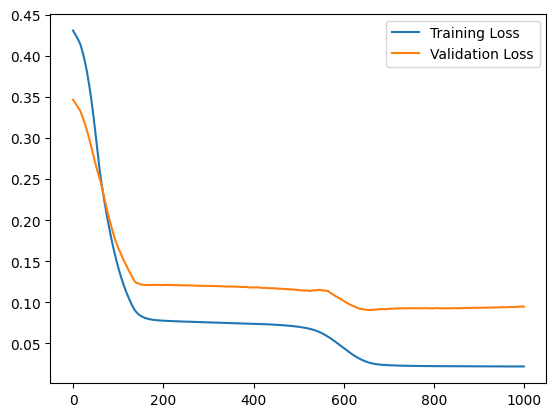

In [45]:
autoencoder = main.create_model(X_train, X_test)

history = autoencoder.fit(X_train, X_train,
          epochs=1000,
          batch_size=512,
          validation_data=(X_test, X_test),
          shuffle=True)


plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


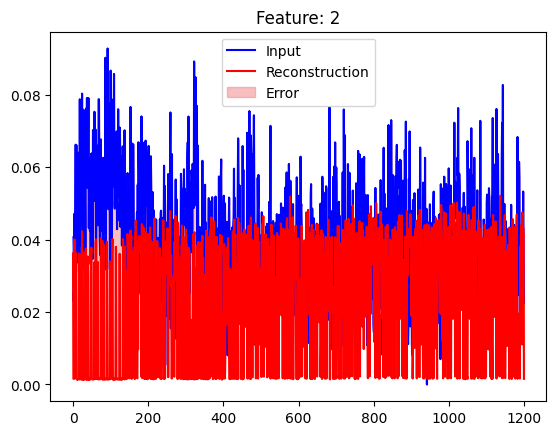

In [46]:


encoded_data = autoencoder.encoder(X_train).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()


feature_index = 2   # or the name: 'temp'
feature_name = X_train.columns[feature_index]

plt.plot(X_train[feature_name].values, 'b', label='Input')
plt.plot(decoded_data[:, feature_index], 'r', label='Reconstruction')
plt.fill_between(
    np.arange(len(X_train)),
    X_train[feature_name].values,
    decoded_data[:, feature_index],
    color='lightcoral',
    alpha=0.5,
    label='Error'
)
plt.legend()
plt.title(f"Feature: {feature_index}")
plt.show()



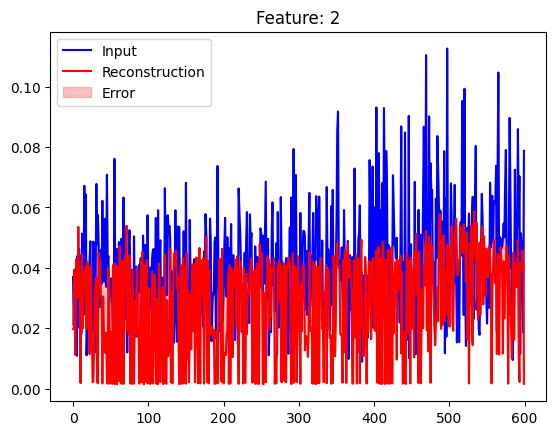

In [47]:
encoded_data = autoencoder.encoder(X_val).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(X_val[feature_name].values, 'b', label='Input')
plt.plot(decoded_data[:, feature_index], 'r', label='Reconstruction')
plt.fill_between(
    np.arange(len(X_val)),
    X_val[feature_name].values,
    decoded_data[:, feature_index],
    color='lightcoral',
    alpha=0.5,
    label='Error'
)
plt.legend()
plt.title(f"Feature: {feature_index}")
plt.show()


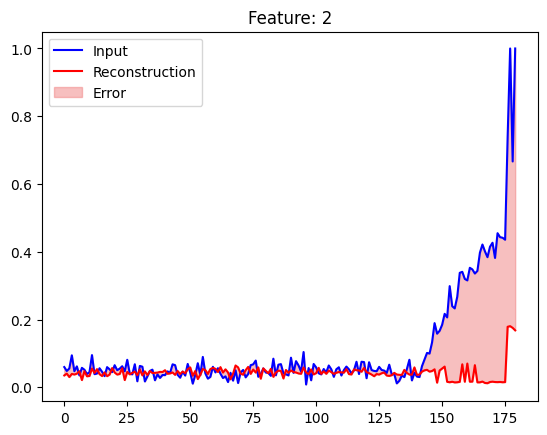

In [48]:
encoded_data = autoencoder.encoder(X_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(X_test[feature_name].values, 'b', label='Input')
plt.plot(decoded_data[:, feature_index], 'r', label='Reconstruction')
plt.fill_between(
    np.arange(len(X_test)),
    X_test[feature_name].values,
    decoded_data[:, feature_index],
    color='lightcoral',
    alpha=0.5,
    label='Error'
)
plt.legend()
plt.title(f"Feature: {feature_index}")
plt.show()



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


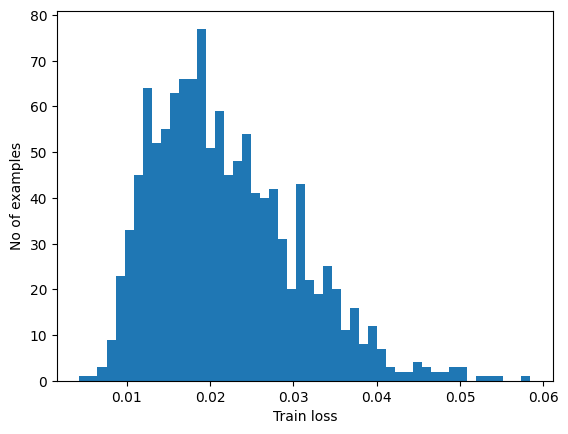

In [49]:
import tensorflow as tf


reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()


In [50]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


Threshold:  0.030451038038212037


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


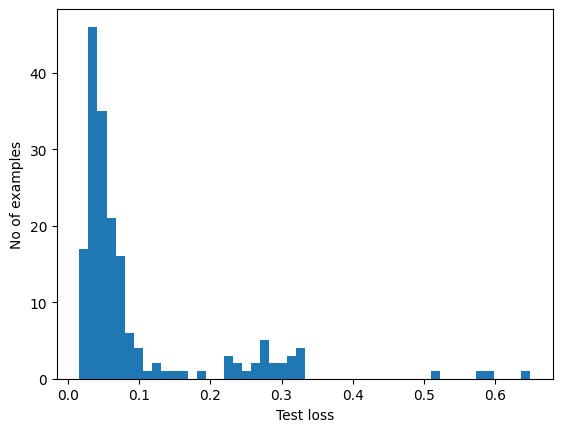

In [51]:
reconstructions = autoencoder.predict(X_test)
test_loss = tf.keras.losses.mae(reconstructions, X_test)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()


In [53]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))


In [54]:
preds = predict(autoencoder, X_test, threshold)

